In [83]:
# Ausführung von modsim.py (muss im selben Ordner liegen) mit imports/Definitionen
%run modsim.py
%matplotlib inline

# Blatt 2: Einschrittverfahren

## Aufgabe 2

Die Lösung des Anfangswertproblems
$$
 \dot{u}(t)=\frac{du(t)}{dt}=-\sin\left(3t\right)+\frac13 u(t),\quad x(0)=1
$$
soll mit numerischen Methoden bestimmt werden. Die rechte Seite der DGL sowie den Anfangwert definieren wir hier:

In [84]:
def ODE_RHS(t,u):
    return -math.sin(3*t) + (1/3)*u

### explizites Euler-Verfahren
Die Definition des expl. Euler-Verfahrens haben wir bereits als Beispiel für Sie vorbereitet.

In [85]:
def explicit_euler(f, u0, t_disc):
    
    # neuer array mit u0 als erstem Element. Wenn u0 ein Vektor ist,
    # wird u so ein zweidimensionaler Array
    u = np.zeros((len(t_disc), len(u0))) #loesungsmatrix
    u[0] = u0                            #Anfangswert
    
    for i in range(1, len(t_disc)):
        t_last = t_disc[i-1]
        t = t_disc[i]
        tau = t-t_last
        
        # der letzte berechnete Wert von u
        u_last = u[i-1]
        
        # Ausführung des Zeitschritts
        u_new = u_last + tau*f(t_last, u_last)
                        
        # Speichern des neuen Werts
        u[i] = u_new
    
    return u
    

### Heun-Verfahren (explizit)

Bitte fügen Sie hier Ihre Implementierung des Heun-Verfahrens ein:

In [86]:
def heun(f, u0, t_disc):
    
    u = np.zeros((len(t_disc), len(u0)))
    u[0] = u0
    
    for i in range(1, len(t_disc)):
        t_last=t_disc[i-1]
        t = t_disc[i]
        tau = t-t_last
        u_last = u[i-1]
        # bis hier analog zu euler
        
        #berechne k1 und k2
        k1 = f(t_last, u_last)
        k2 = f(t, u_last + tau*k1)
        
        #Kombiniere zu neuer Loesung
        u[i] = u_last + tau*(1/2)*(k1 + k2)
    return u


### Runge-Kutta-Verfahren

Bitte fügen Sie hier Ihre Implementierung des Runge-Kutta-Verfahrens ein:

In [87]:
def runge_kutta(f, u0, t_disc):
    
    u = np.zeros((len(t_disc), len(u0)))
    u[0] = u0
    
    for i in range(1, len(t_disc)):

        t_last=t_disc[i-1]
        t = t_disc[i]
        tau = t-t_last
        u_last = u[i-1]
        # bis hier analog zu euler
    
        #berechne k1,k2,k3 und k4
        tau_h = tau * (1/2)
        k1 = f(t_last, u_last)
        k2 = f(t_last + tau_h, u_last+tau_h*k1)
        k3 = f(t_last + tau_h, u_last+tau_h*k2)
        k4 = f(t, u_last+tau*k3)

        #Kombiniere zu neuer Loesung
        u[i] = u_last + tau*(1/6)*(k1+(2*k2)+(2*k3)+k4)
    return u
    

### implizites Euler-Verfahren

Bitte fügen Sie hier Ihre Implementierung des implizitem Euler-Verfahrens ein. Hierfür ist die Verwendung von [scipy.optimize.fsolve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html) sinnvoll. 

### Bestimme Gleichung fuer impliziten Euler

$$
 f(t, u(t)) = -\sin(3t) + \frac{1}{3}u(t)
$$

$$
 y(t+1) = y(t) + \tau*f(t+1, u(t+1)
$$
$$
y(t+1) = y(t) + \tau*(-\sin(3(t+1)) + \frac{1}{3}y(t+1))
$$
$$
y(t+1) = y(t) + \tau*-\sin(3(t+1)) + \frac{\tau}{3}y(t+1))
$$
$$
y(t+1) - \frac{\tau}{3}y(t+1) = y(t) + \tau*-\sin(3(t+1))
$$
$$
y(t+1)*(1-\frac{\tau}{3}) = y(t) + \tau*-\sin(3(t+1))
$$
$$
y(t+1) = -\frac{y(t) + \tau*-\sin(3(t+1))}{1-\frac{\tau}{3}} 
$$

Result can be used to calculate new position after step $\tau$

In [88]:
def implizit_euler(f, u0, t_disc):
    u = np.zeros((len(t_disc), len(u0)))
    u[0] = u0
    
    for i in range(1, len(t_disc)):

        t_last=t_disc[i-1]
        t = t_disc[i]
        tau = t-t_last
        u_last = u[i-1]
        # bis hier analog zu euler
        
        # berechne ui anhand oberer Gleichung
        u[i] = (u_last + tau*-1*np.sin(3*t))/(1-(tau/3))
    return u
        

In der nächsten Zelle, die sie nur noch ausführen müssen, werden Ihre Implementierungen ausgeführt und das Ergebniss geplottet:

Punkte 0-2 von expl_euler:  [1.] [1.33333333] [1.63665777]
Punkte 0-2 von heun:  [1.] [1.31832888] [1.87664008]
Punkte 0-2 von runge_kutta:  [1.] [0.58699063] [1.60222733]
Punkte 0-2 von imp_euler:  [1.] [1.28831999] [2.35160323]


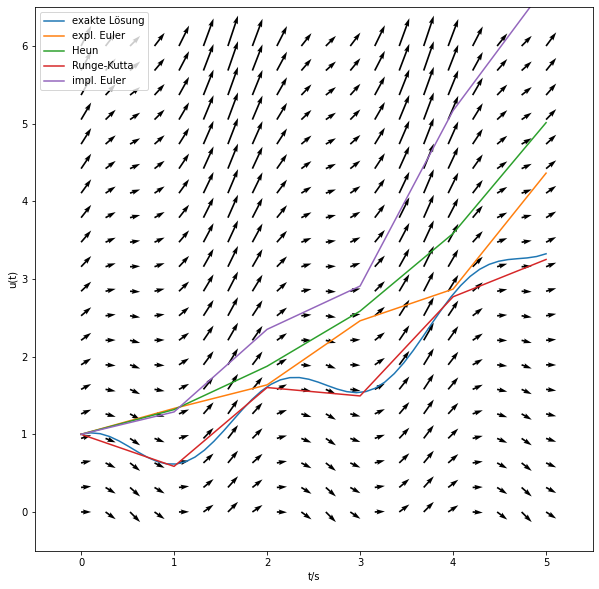

In [96]:
# Der Anfangswert u0
u0 = np.array([1])

# Die Zeitpunkte, an denen die Verfahren die Werte der Lösung bestimmen sollen
t_disc = np.arange(0,6,1)

# Exakte Lösung
solution = scipy.integrate.odeint(ODE_RHS, u0, np.linspace(0,5), tfirst=True)

# Lösungen der Verfahren - jeweils Kommentar entfernen
expl_euler_lsg = explicit_euler(ODE_RHS, u0, t_disc)
heun_lsg = heun(ODE_RHS, u0, t_disc)
runge_kutta_lsg = runge_kutta(ODE_RHS, u0, t_disc)
impl_euler_lsg = implizit_euler(ODE_RHS, u0, t_disc)

# Print von Loesungen
print("Punkte 0-2 von expl_euler: ", expl_euler_lsg[0], expl_euler_lsg[1], expl_euler_lsg[2])
print("Punkte 0-2 von heun: ", heun_lsg[0], heun_lsg[1], heun_lsg[2])
print("Punkte 0-2 von runge_kutta: ", runge_kutta_lsg[0], runge_kutta_lsg[1], runge_kutta_lsg[2])
print("Punkte 0-2 von imp_euler: ", impl_euler_lsg[0], impl_euler_lsg[1], impl_euler_lsg[2])

# Ein Plot mit allen approximierten Lösungen, der exakten Lösung und dem Richtungsfeld der ODE
plot_richtungsfeld(ODE_RHS, 20, 0, 5, 0, 6)

plt.plot(np.linspace(0,5), solution, label="exakte Lösung")
plt.plot(t_disc, expl_euler_lsg, label="expl. Euler")
plt.plot(t_disc, heun_lsg, label="Heun")
plt.plot(t_disc, runge_kutta_lsg, label="Runge-Kutta")
plt.plot(t_disc, impl_euler_lsg, label="impl. Euler")

plt.rcParams["figure.figsize"] = (10,10)
plt.xlabel("t/s")
plt.ylabel("u(t)")
plt.legend()
plt.show()

## Aufgabe 3

### b) 

Verwenden Sie ein Einschrittverfahren Ihrer Wahl, um dieses Anfangswertproblem auf dem Zeitintervall $[0, 100]$ mit Schrittgröße $\tau = 1$ zu lösen. Verwenden Sie dabei den Fakt, dass die implementierten Verfahren alle mit vektorwertigen Lösungen funktionieren.

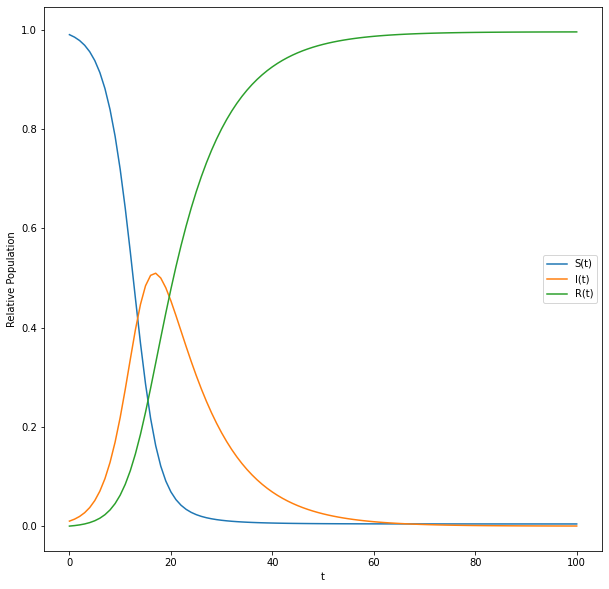

In [90]:
# TODO...
#example
def ODE_RHS(t,u):
    return -math.sin(3*t) + (1/3)*u


# ====================================

def SUS(SIRV, a=0.5, b=0.1):
    return -a*SIRV[0]*SIRV[1]

def INF(SIRV, a=0.5, b=0.1):
    return a*SIRV[0]*SIRV[1] - b*SIRV[1]

def REC(SIRV, a=0.5, b=0.1):
    return b*SIRV[1]

def VAC(SIRV, a=0.5, b=0.1):
    return 0

def exp_eul_SIR(f, u0, t_disc):
    
    # neuer array mit u0 als erstem Element. Wenn u0 ein Vektor ist,
    # wird u so ein zweidimensionaler Array
    u = np.zeros((len(t_disc), len(u0))) #loesungsmatrix
    u[0] = u0                            #Anfangswert
    
    for i in range(1, len(t_disc)):
        for j in range(0, len(f)):
            
            t_last = t_disc[i-1]
            t = t_disc[i]
            tau = t-t_last

            # der letzte berechnete Wert von u
            u_last = u[i-1][j]

            # Ausführung des Zeitschritts
            u_new = u_last + tau*f[j](u[i-1])

            # Speichern des neuen Werts
            u[i][j] = u_new

    return u

u0 = np.array([0.99, 0.01, 0, 0])

t_disc = np.arange(0,101,1)

funcs = [SUS, INF, REC, VAC]

sir_lsg = exp_eul_SIR(funcs, u0, t_disc)
# ....mit dem sog. slicing können wir verschiedene Vektorkomponenten plotten:
plt.plot(t_disc, sir_lsg[:,0], label="S(t)")
plt.plot(t_disc, sir_lsg[:,1], label="I(t)")
plt.plot(t_disc, sir_lsg[:,2], label="R(t)")
#plt.plot(t_disc, sir_lsg[:,0], label="V(t)")

plt.rcParams["figure.figsize"] = (10,10)
plt.xlabel("t/s")
plt.ylabel("Relative Population normed to 1")
plt.legend()
plt.show()


### c/d) 

Erweitern Sie das Modell und auch Ihre Implementierung um eine geimpfte Bevölkerungsgruppe $V$. Gehen Sie dabei davon aus, dass pro Zeiteinheit ein Anteil von $c = 0.01$ **aller nicht geimpfter** Individuen geimpft wird.

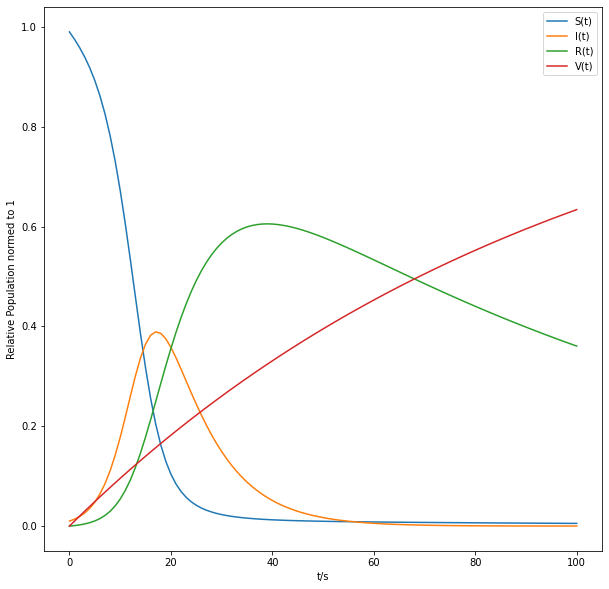

In [98]:
# Erweiteres Modell

def SUS(SIRV, a=0.5, b=0.1, c=0.01):
    return -a*SIRV[0]*SIRV[1] - c*SIRV[0]

def INF(SIRV, a=0.5, b=0.1, c=0.01):
    return a*SIRV[0]*SIRV[1] - b*SIRV[1] - c*SIRV[1]

def REC(SIRV, a=0.5, b=0.1, c=0.01):
    return b*SIRV[1] - c*SIRV[2]

def VAC(SIRV, a=0.5, b=0.1, c=0.01):
    return c*SIRV[0] + c*SIRV[1] + c*SIRV[2]



u0 = np.array([0.99, 0.01, 0, 0])
t_disc = np.arange(0,101,1)
funcs = [SUS, INF, REC, VAC]



sir_lsg = exp_eul_SIR(funcs, u0, t_disc)
# ....mit dem sog. slicing können wir verschiedene Vektorkomponenten plotten:
plt.plot(t_disc, sir_lsg[:,0], label="S(t)")
plt.plot(t_disc, sir_lsg[:,1], label="I(t)")
plt.plot(t_disc, sir_lsg[:,2], label="R(t)")
plt.plot(t_disc, sir_lsg[:,3], label="V(t)")

plt.rcParams["figure.figsize"] = (10,10)
plt.xlabel("t/s")
plt.ylabel("Relative Population normed to 1")
plt.legend()
plt.show()

